# Support Vector Machines 

In this Notebook I will be coding along with the SVM chapter from Hands on Machine Learning book

### Linear SVM Classification

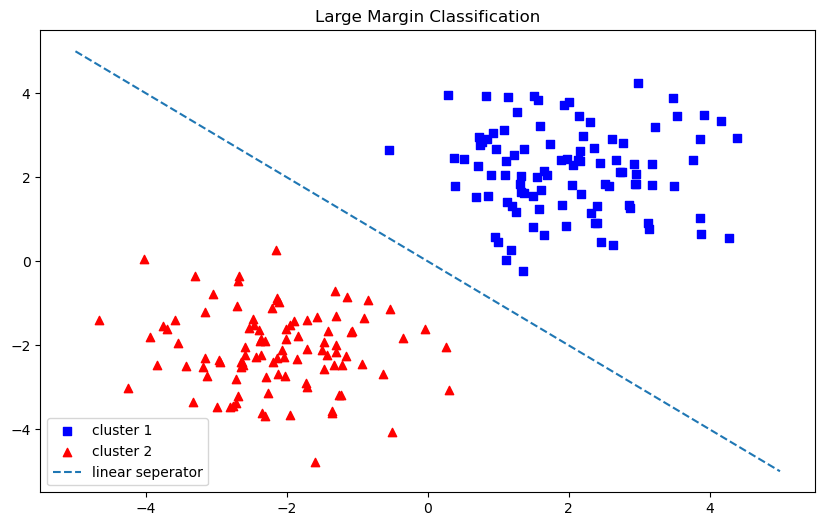

In [83]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.title('Large Margin Classification')

np.random.seed(0)
cluster1 = np.random.randn(100,2) + np.array([2,2])  # 100 coordinates centred on 2,2
cluster2 = np.random.randn(100,2) + np.array([-2,-2]) #100 coordinates centred on -2,-2

#plot
plt.scatter(cluster_1[:,0],cluster_1[:,1],color='b',marker='s',label='cluster 1')
plt.scatter(cluster_2[:,0],cluster_2[:,1],color='r',marker='^',label='cluster 2')

#linear seperator
x = np.linspace(-5,5,100)
y=-x
plt.plot(x,y,linestyle='--',label='linear seperator')
plt.legend()

- The fundamental idea of the SVM can be seen by the plot above, which separates two classes easily with a straight line.
- You can think of an SVM classifier as fitting the widest possible street between the classes if you imagine the separator in between the support vectors. 
- This is called large margin classification.
- Adding more training data only affects the decision boundary if it is near the edge; these data points near the edge are called the support vectors.

### Soft Margin Classification
- If we stay strict and say all datapoints must be on a clear side, this is called Hard Margin classification.
- there are some issues with this method
 - the data must be linearly seperable
 - It is vulnerable to outliers

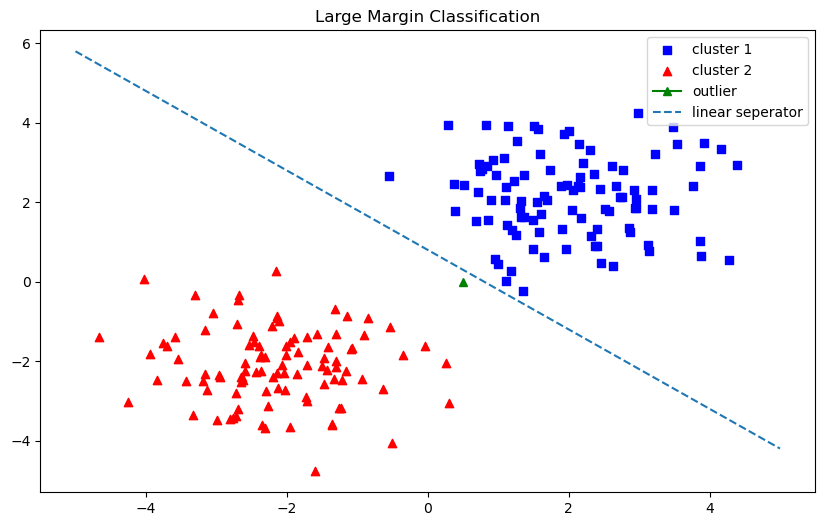

In [82]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.title('Large Margin Classification')

np.random.seed(0)
cluster1 = np.random.randn(100,2) + np.array([2,2])  # 100 coordinates centred on 2,2
cluster2 = np.random.randn(100,2) + np.array([-2,-2]) #100 coordinates centred on -2,-2

#plot
plt.scatter(cluster_1[:,0],cluster_1[:,1],color='b',marker='s',label='cluster 1')
plt.scatter(cluster_2[:,0],cluster_2[:,1],color='r',marker='^',label='cluster 2')
plt.plot(0.5,0,color='g',marker='^',label='outlier')

#linear seperator
x = np.linspace(-5,5,100)
y=-x+0.8
plt.plot(x,y,linestyle='--',label='linear seperator')
plt.legend()

- You can see clearly here that the presence of an outlier has shifted the decision boundary, making it look a lot different than before
- Furthermore, if the outlier was in cluster 2, a hard margin would be impossible.
- To avoid this, a more flexible model is used. We need to keep the street as large as possible and limit the amount of margin violations.
- This is called soft margin classification.

### Example Training a SVM Model

In [90]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [98]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)] #petal length, petal width
y = (iris['target']==2).astype(np.float64) #Iris virginica, each entry is 1 where specieis is virginica

svm_clf = Pipeline([
    ('scaler',StandardScaler()),
    ('linear_SVC',LinearSVC(C=1,loss='hinge')) #support vector classifier,hinge is standard for SVM
    ])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_SVC', LinearSVC(C=1, loss='hinge'))])

In [99]:
svm_clf.predict( [[5.5,1.7]] )

array([1.])

Notice how, unlike logistic regression, the SVM classifier does not output probabilities for each class

#### Nuances
Instead of using the `LinearSVC` class, we can use the SVC class with a linear kernel, for example:
`SVC(kernel='linear', C=1)`.
Or we can use the `SGDClassifier(loss='hinge', alpha=1/(m*C))`. This applies regular Stochastic Gradient Descent to train a linear SVM classifier. It is essentially doing the same thing. Note, it doesn't converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory (out-of-core training)

`# Define SVM classifier pipeline using SVC with linear kernel
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_SVC', SVC(kernel='linear', C=1))
])`

`# Define SVM classifier pipeline using SGDClassifier with hinge loss
sgd_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_SGD', SGDClassifier(loss='hinge', alpha=1/(m*1)))  # Here C=1
])`